## Project Overview: Basic Analysis and Negative Survey Reconstruction on Lung Cancer Dataset

This project focuses on the basic analysis and negative survey prediction reconstruction using a lung cancer dataset. The dataset contains information on whether 309 individuals have lung cancer, along with 13 other medical survey indicators. In the dataset, a value of 1 represents "No", and 2 represents "Yes". We assume that the survey responses are truthful, and we begin with a basic data analysis based on this assumption.

Next, we present a visual representation of the lung cancer status of survey participants across different age groups. 

It can be observed that the majority of the collected data corresponds to individuals who have lung cancer, with their ages mainly concentrated between 55 and 70 years old.



<Figure size 1500x700 with 0 Axes>

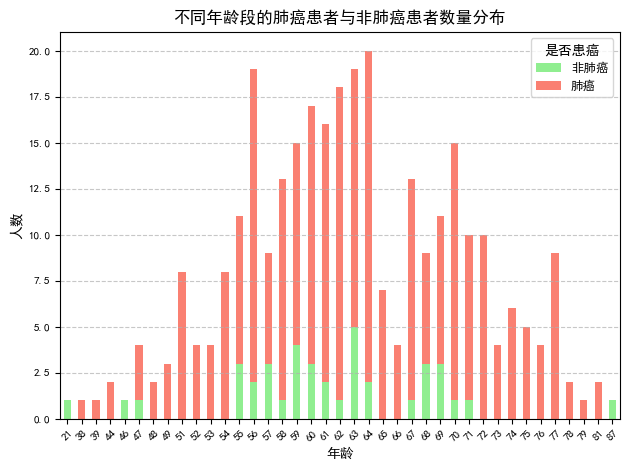

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置中文字体和字体大小
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置黑体或其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
mpl.rcParams['font.size'] = 10  # 全局字体大小

# 加载数据
df = pd.read_csv('survey lung cancer.csv')

# 按年龄和肺癌状态分组计数
age_cancer_counts = df.groupby(['AGE', 'LUNG_CANCER']).size().unstack()

# 绘制图表
plt.figure(figsize=(15, 7))
age_cancer_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('不同年龄段的肺癌患者与非肺癌患者数量分布', fontsize=12)  # 标题字体大小
plt.xlabel('年龄', fontsize=10)  # x轴标签字体大小
plt.ylabel('人数', fontsize=10)  # y轴标签字体大小
plt.legend(title='是否患癌', labels=['非肺癌', '肺癌'], fontsize=9)  # 图例字体大小
plt.xticks(rotation=45, fontsize=8)  # x轴刻度字体大小
plt.yticks(fontsize=8)  # y轴刻度字体大小
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Correlation Analysis Between Medical Indicators and Lung Cancer

Next, we are interested in the relationships among the 13 medical indicators and their impact on lung cancer. To explore this, a correlation heatmap was generated.

The correlation coefficient is calculated using the following formula:

$$
\rho_{X,Y} = \frac{\mathrm{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

From the heatmap, it is evident that most symptoms show a **positive correlation** with lung cancer. Among them, the top three features with the highest correlation coefficients are:

- **ALLERGY**: 0.328  
- **ALCOHOL CONSUMING**: 0.289  
- **SWALLOWING DIFFICULTY**: 0.260  

These results suggest that we should pay special attention to these factors in daily life, as they are more strongly associated with the presence of lung cancer.



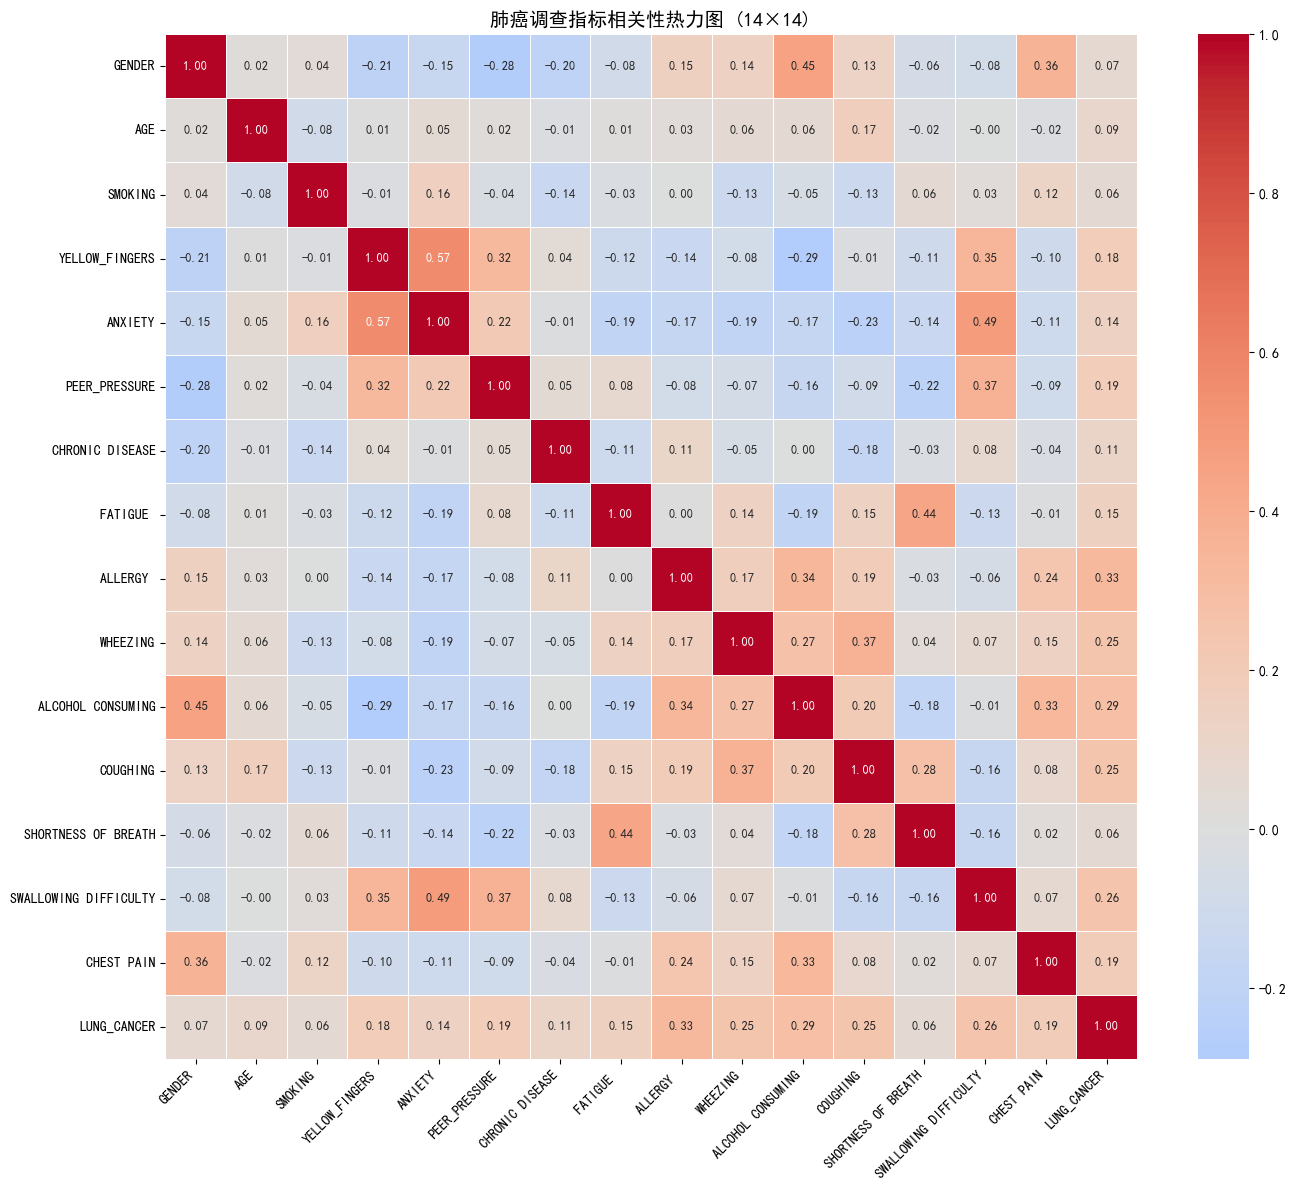


对肺癌影响最大的三个指标:
1. ALLERGY : 0.328
2. ALCOHOL CONSUMING: 0.289
3. SWALLOWING DIFFICULTY: 0.260


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
df = pd.read_csv('survey lung cancer.csv')

# 数据预处理
# 将GENDER和LUNG_CANCER转换为数值
df['GENDER'] = LabelEncoder().fit_transform(df['GENDER'])  # 男=1, 女=0
df['LUNG_CANCER'] = LabelEncoder().fit_transform(df['LUNG_CANCER'])  # YES=1, NO=0

# 计算相关系数矩阵
corr_matrix = df.corr()

# 绘制热力图
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            center=0, linewidths=0.5, annot_kws={"size": 9})
plt.title('肺癌调查指标相关性热力图 (14×14)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 找出对肺癌影响最大的三个指标
lung_cancer_corr = corr_matrix['LUNG_CANCER'].abs().sort_values(ascending=False)[1:4]  # 排除自身相关性

print("\n对肺癌影响最大的三个指标:")
for idx, (feature, corr) in enumerate(lung_cancer_corr.items(), 1):
    print(f"{idx}. {feature}: {corr:.3f}")

## Clustering Analysis: KMeans vs. DBSCAN

We performed clustering to group individuals based on their medical indicators. We compared the results of **KMeans** and **DBSCAN** clustering algorithms and selected the better-performing method based on evaluation metrics.

---

### KMeans Clustering

In the KMeans method, we used the **Elbow Method** to determine the optimal number of clusters $ k $. The elbow plot shows the sum of squared errors (SSE) for different values of $ k $:

$$
\text{SSE} = \sum_{i=1}^{k} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2
$$

Where:
- $ C_i $ is the set of points in cluster $ i $,
- $ \mu_i $ is the centroid of cluster $ i $,
- $ x_j $ is a data point in cluster $ C_i $

From the elbow plot, we observed that the curve decreases uniformly without a clear inflection point, suggesting that the clustering structure is not well-defined. The relatively **low silhouette score** also confirms the poor clustering quality.

---

### DBSCAN Clustering

For DBSCAN, we used **grid search** to find the best combination of hyperparameters:

- $ \varepsilon $: the radius of the neighborhood,
- $ \text{minPts} $: the minimum number of points required to form a dense region.

DBSCAN classifies points into core, border, and noise points based on density:

- A point $ p $ is a **core point** if there are at least `minPts` points (including $ p $) within distance $ \varepsilon $.
- A point $ q $ is **directly density-reachable** from $ p $ if $ p $ is a core point and $ q $ is within $ \varepsilon $ from $ p $.
- A point is **noise** if it is not density-reachable from any core point.

The silhouette score used to evaluate clustering is defined as:

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$

Where:

- $ a(i) $: average distance from point $ i $ to other points in the same cluster,
- $ b(i) $: minimum average distance from point $ i $ to points in a different cluster.

From our DBSCAN results, we found a set of optimal hyperparameters that led to a **silhouette score of over 77%**, indicating a very good clustering structure.

---

### Visualization

We projected the final clustering results onto the **first two principal components** using PCA for visualization. The resulting plot shows the spatial distribution of clusters and provides an intuitive understanding of how well-separated the clusters are.

---

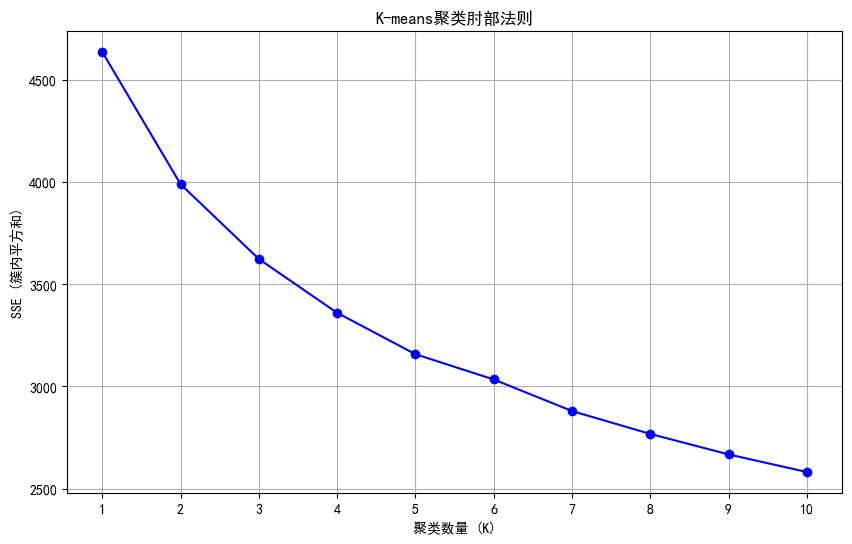

K-means轮廓系数: 0.139
DBSCAN轮廓系数: 0.771

DBSCAN聚类效果更好


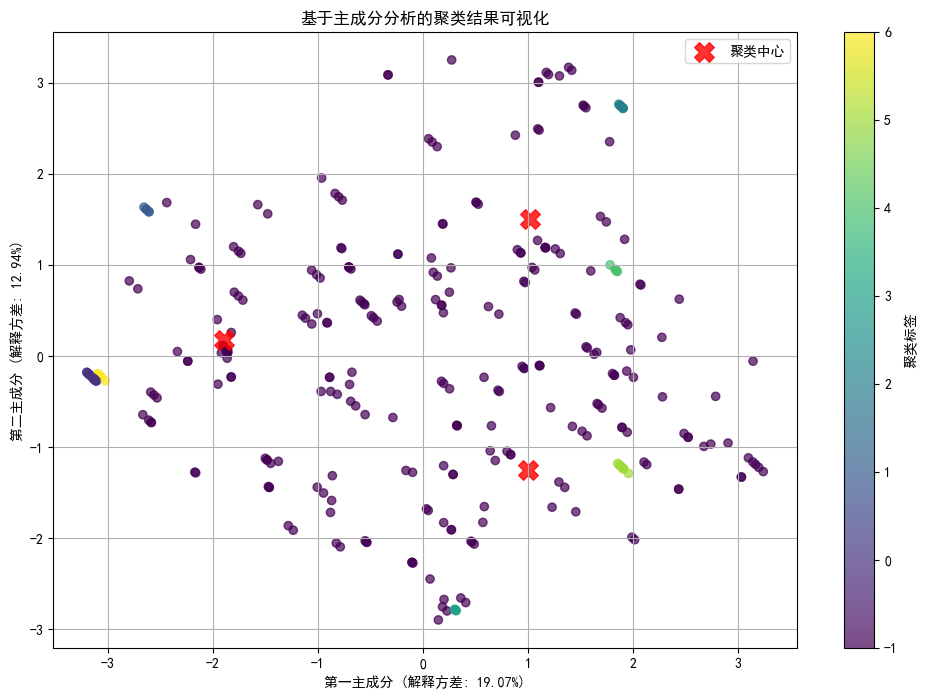


主成分与原始特征的关系:
                            PC1       PC2
GENDER                -0.321176  0.307963
AGE                   -0.035186  0.037483
SMOKING                0.045253  0.044374
YELLOW_FINGERS         0.379757  0.116602
ANXIETY                0.403638  0.225398
PEER_PRESSURE          0.305393  0.079851
CHRONIC DISEASE        0.089177  0.046033
FATIGUE               -0.103716 -0.430134
ALLERGY               -0.252244  0.217189
WHEEZING              -0.246324  0.095105
ALCOHOL CONSUMING     -0.333769  0.424371
COUGHING              -0.280022 -0.081394
SHORTNESS OF BREATH   -0.140618 -0.445483
SWALLOWING DIFFICULTY  0.290217  0.332032
CHEST PAIN            -0.237343  0.303713


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import warnings
import os

# 设置OMP线程数，避免KMeans在MKL上的内存泄漏警告
os.environ['OMP_NUM_THREADS'] = '2'

# 屏蔽所有警告（如果你只想屏蔽特定类型，也可以更细粒度控制）
warnings.filterwarnings("ignore")

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
df = pd.read_csv('survey lung cancer.csv')

# 数据预处理
df_encoded = df.copy()
df_encoded['GENDER'] = LabelEncoder().fit_transform(df['GENDER'])  # 男=1, 女=0
df_encoded['LUNG_CANCER'] = LabelEncoder().fit_transform(df['LUNG_CANCER'])  # YES=1, NO=0

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.iloc[:, :-1])  # 排除LUNG_CANCER列

# K-means 聚类与肘部法则
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('聚类数量 (K)')
plt.ylabel('SSE (簇内平方和)')
plt.title('K-means聚类肘部法则')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# 选择最佳K值
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-means轮廓系数: {kmeans_silhouette:.3f}")

# DBSCAN 聚类
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"DBSCAN轮廓系数: {dbscan_silhouette:.3f}")
else:
    print("DBSCAN未能找到有效聚类")

# 聚类对比
if 'dbscan_silhouette' in locals():
    if kmeans_silhouette > dbscan_silhouette:
        print("\nK-means聚类效果更好")
        final_labels = kmeans_labels
    else:
        print("\nDBSCAN聚类效果更好")
        final_labels = dbscan_labels
else:
    print("\nK-means是唯一有效的聚类方法")
    final_labels = kmeans_labels

# PCA 降维可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.xlabel('第一主成分 (解释方差: {:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('第二主成分 (解释方差: {:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('基于主成分分析的聚类结果可视化')
plt.colorbar(scatter, label='聚类标签')
plt.grid(True)

if 'kmeans' in locals():
    centers_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, alpha=0.8, label='聚类中心')
    plt.legend()

plt.show()

# 主成分与原始特征关系
print("\n主成分与原始特征的关系:")
pca_loadings = pd.DataFrame(pca.components_.T, 
                           columns=['PC1', 'PC2'],
                           index=df_encoded.iloc[:, :-1].columns)
print(pca_loadings)


### Modeling Biased Survey Responses and Reconstruction

Lung cancer–related questions are considered sensitive, and we take into account that some respondents might not answer honestly during the survey. Therefore, we aim to build a model to reconstruct truthful responses from mixed and potentially biased survey data.

To begin, we simulate survey responses based on the following **transition matrix**, where the available survey response options are:

- **Yes (1)**
- **No (2)**
- **Don't Know (3)**
- **Refused to Answer (4)**

However, the actual health status of individuals is only binary: **Yes (has lung cancer)** or **No (does not have lung cancer)**.

We use the following emission (observation) probability matrix:

$$
\begin{bmatrix}
0.8 & 0.0 & 0.1 & 0.1 \\
0.4 & 0.3 & 0.2 & 0.1
\end{bmatrix}
$$

This matrix is designed to reflect realistic tendencies:

- A person **without** the disease is very likely to truthfully report "No" and will never report "Yes".
- A person **with** the disease has a certain probability of misreporting as "No", "Don't Know", or even "Refused to Answer".

This structure provides a basis for building a reconstruction model that can infer the true health status from noisy or biased responses.



In [43]:
import pandas as pd
import numpy as np
import os

# 设置随机种子（可选）
#np.random.seed(42)

# 第一步：加载原始CSV文件
input_file = 'survey lung cancer.csv'  # 请确保文件在当前目录
output_file = 'survey_lung_cancer_modified1.csv'
df = pd.read_csv(input_file)

# 第二步：将最后一列 'LUNG_CANCER' 的 "YES"/"NO" 映射为 2 和 1
if df.columns[-1] == 'LUNG_CANCER':
    df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 2, 'NO': 1})

# 第三步：定义状态转移概率矩阵
transition_matrix = {
    1: [0.8, 0.0, 0.1, 0.1],  # 原值1
    2: [0.4, 0.3, 0.2, 0.1],  # 原值2
}

# 第四步：定义替换函数
def replace_value(value):
    if value in transition_matrix:
        return np.random.choice([1, 2, 3, 4], p=transition_matrix[value])
    return value  # 非1或2的数值保留原值

# 第五步：对从第3列开始（含 'LUNG_CANCER'）的所有列进行值替换
for col in df.columns[2:]:
    df[col] = df[col].apply(replace_value)

# 第六步：保存结果到新CSV文件
df.to_csv(output_file, index=False)

# 第七步：读取并展示新文件前10行
df_modified = pd.read_csv(output_file)
df_modified.head(10)



,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,4,3,1,1,1,1,3,1,1,1,1,3,2
1,M,74,4,1,4,3,1,2,1,1,1,3,1,1,1,4
2,F,59,1,1,1,2,4,3,1,1,1,2,1,1,1,1
3,M,63,3,3,3,1,1,1,4,1,1,1,1,4,3,3
4,F,63,1,3,3,1,1,1,1,1,1,4,1,1,1,1
5,F,75,1,4,3,1,3,3,3,4,1,2,2,1,4,2
6,M,52,2,1,1,3,3,2,1,1,2,1,1,1,4,2
7,F,51,2,3,1,1,4,2,1,1,1,1,2,1,1,3
8,F,68,1,1,2,3,4,2,1,1,1,4,1,3,1,1
9,M,53,1,3,2,2,1,1,1,1,2,3,1,1,3,3


## Applying NStoPS_I Algorithm for State Reconstruction

Through literature review, we found that the NStoPS series algorithms are commonly used for similar scenarios. However, in this real-world case where we need to transition from two states to four states, the NStoPS and NStoPS_II algorithms are not well-suited. Instead, we utilize the **NStoPS_I algorithm** for forward reconstruction and present a portion of the reconstructed dataset.

### NStoPS_I Algorithm Details

The NStoPS_I algorithm performs state reconstruction by modeling the state transitions. The key calculations involve:

1. **State Probability Calculation**:
   $$
   P(s_t | x_t) = \frac{P(x_t | s_t) P(s_t)}{P(x_t)}
$$
   where:
   - $P(s_t | x_t)$: Posterior probability of being in state $s_t$ given observation $x_t$
   - $P(x_t | s_t)$: Likelihood of observation $x_t$ given state $s_t$
   - $P(s_t)$: Prior probability of state $s_t$
   - $P(x_t)$: Marginal likelihood of observation $x_t$

2. **State Transition Modeling**:
   $$
   P(s_{t+1} | s_t) = \frac{\text{Number of transitions from } s_t \text{ to } s_{t+1}}{\text{Total number of transitions from } s_t}
$$
   This models the probability of transitioning from state $s_t$ to state $s_{t+1}$.

3. **Forward Reconstruction**:
   The algorithm reconstructs the sequence of states by:
   - Starting with the initial state probabilities
   - Iteratively applying the state transition probabilities
   - Updating the state probabilities at each time step using the observation likelihoods




In [51]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

# 第1步：读取数据
data = pd.read_csv("survey_lung_cancer_modified1.csv")

# 第2步：提取特征数据（跳过性别和年龄列）
X = data.iloc[:, 2:].values.astype(int)

# 第3步：定义 NStoPS-I 方法函数
def nstops_i_reconstruction(X, n_clusters=2, segment_len=3):
    n_samples, n_features = X.shape
    reconstructed = np.zeros_like(X)

    for i in range(n_samples):
        sequence = X[i]

        # Step 1: 分段
        segments = [sequence[j:j+segment_len] for j in range(0, len(sequence), segment_len)]
        segments = [seg for seg in segments if len(seg) == segment_len]

        # Step 2: 聚类每个段（按段维度聚类）
        segment_array = np.array(segments)
        if len(segment_array) < n_clusters:
            labels = [0] * len(segment_array)
        else:
            kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
            labels = kmeans.fit_predict(segment_array)

        # Step 3: 找出每一类的主模式
        cluster_modes = {}
        for c in range(n_clusters):
            cluster_segments = segment_array[np.array(labels) == c]
            if len(cluster_segments) > 0:
                mode_segment = []
                for col in cluster_segments.T:
                    mode_segment.append(Counter(col).most_common(1)[0][0])
                cluster_modes[c] = np.array(mode_segment)
            else:
                cluster_modes[c] = np.random.randint(1, 3, size=segment_len)

        # Step 4: 重建每个段
        new_sequence = []
        for label in labels:
            new_sequence.extend(cluster_modes[label])
        
        # Step 5: 补全为原长度
        while len(new_sequence) < n_features:
            new_sequence.append(np.random.randint(1, 3))
        reconstructed[i, :] = new_sequence[:n_features]

    return reconstructed

# 第4步：调用 NStoPS-I 重建方法
X_reconstructed = nstops_i_reconstruction(X, n_clusters=2, segment_len=3)

# 第5步：将重建后的值替换回 DataFrame
reconstructed_data = data.copy()
reconstructed_data.iloc[:, 2:] = X_reconstructed

# 第6步：将值限制在1和2之间
reconstructed_data.iloc[:, 2:] = reconstructed_data.iloc[:, 2:].clip(1, 2)

# 第7步：保存到 CSV 文件
reconstructed_data.to_csv("reconstructed_NStoPS-I.csv", index=False)

# 第8步：预览前10行
print(reconstructed_data.head(10))


  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        2              2   
2      F   59        1               1        1              2   
3      M   63        2               1        1              2   
4      F   63        1               1        1              1   
5      F   75        1               2        2              1   
6      M   52        1               1        1              2   
7      F   51        2               2        1              2   
8      F   68        1               1        2              2   
9      M   53        1               2        2              2   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         1         1         2                  2         1   
1                1         2         1         1                  1         2   
2                2         2  

## Innovative Application of Hidden Markov Model (HMM) with Baum-Welch and Viterbi Algorithms

In this innovative approach, we employ a Hidden Markov Model (HMM) framework, specifically using hidden Markov chains. Our key assumptions are:

1. **State Dependence**: There exists correlation between different questions
2. **Transition Probabilities**: We construct a transition probability matrix that captures these dependencies
3. **Emission Probabilities**: Each hidden state corresponds to uncertain observable states, forming an emission matrix

### Mathematical Formulation of HMM

An HMM is defined by the following components:

1. **Hidden States**: $S = \{s_1, s_2, ..., s_N\}$ (set of N hidden states)
2. **Observation Symbols**: $V = \{v_1, v_2, ..., v_M\}$ (set of M possible observations)
3. **Initial State Distribution**: $\pi = [\pi_1, \pi_2, ..., \pi_N]$ where $\pi_i = P(s_i \text{ at } t=1)$
4. **Transition Probability Matrix**: $A = [a_{ij}]$ where:
   $$
   a_{ij} = P(s_j \text{ at } t+1 | s_i \text{ at } t)
$$
   (probability of transitioning from state $s_i$ to $s_j$)
5. **Emission Probability Matrix**: $B = [b_j(k)]$ where:
   $$
   b_j(k) = P(v_k \text{ at } t | s_j \text{ at } t)
$$
   (probability of observing symbol $v_k$ given hidden state $s_j$)

### Baum-Welch Algorithm (Expectation-Maximization for HMM)

The Baum-Welch algorithm is used to estimate the HMM parameters ($\pi$, $A$, $B$) from observed data. The key steps are:

1. **Forward Algorithm** (Compute $\alpha_t(i)$):
   $$
   \alpha_t(i) = P(o_1, o_2, ..., o_t, s_t = s_i | \text{model})
$$
   Recurrence relation:
   $$
   \alpha_t(j) = \left[ \sum_{i=1}^N \alpha_{t-1}(i) a_{ij} \right] b_j(o_t)
$$

2. **Backward Algorithm** (Compute $\beta_t(i)$):
   $$
   \beta_t(i) = P(o_{t+1}, o_{t+2}, ..., o_T | s_t = s_i, \text{model})
$$
   Recurrence relation:
   $$
   \beta_t(i) = \sum_{j=1}^N a_{ij} b_j(o_{t+1}) \beta_{t+1}(j)
$$

3. **Compute Intermediate Quantities**:
   - State occupation probability:
     $$
     \gamma_t(i) = \frac{\alpha_t(i) \beta_t(i)}{P(O|\text{model})}
$$
   - State transition probability:
     $$
     \xi_t(i,j) = \frac{\alpha_t(i) a_{ij} b_j(o_{t+1}) \beta_{t+1}(j)}{P(O|\text{model})}
$$

4. **Parameter Re-estimation**:
   - New initial probabilities:
     $$
     \bar{\pi}_i = \gamma_1(i)
$$
   - New transition probabilities:
     $$
     \bar{a}_{ij} = \frac{\sum_{t=1}^{T-1} \xi_t(i,j)}{\sum_{t=1}^{T-1} \gamma_t(i)}
$$
   - New emission probabilities:
     $$
     \bar{b}_j(k) = \frac{\sum_{t=1}^T \gamma_t(j) [o_t = v_k]}{\sum_{t=1}^T \gamma_t(j)}
$$

5. **Convergence Check**:
   Repeat until parameter changes are below a threshold $\epsilon$.

### Viterbi Algorithm (Decoding the Most Likely State Sequence)

The Viterbi algorithm finds the most probable sequence of hidden states given the observations:

1. **Initialization**:
   $$
   \delta_1(i) = \pi_i b_i(o_1)
$$
   $$
   \psi_1(i) = 0
$$

2. **Recurrence**:
   For $t = 2$ to $T$:
   $$
   \delta_t(j) = \max_{1 \leq i \leq N} [\delta_{t-1}(i) a_{ij}] b_j(o_t)
$$
   $$
   \psi_t(j) = \arg\max_{1 \leq i \leq N} [\delta_{t-1}(i) a_{ij}]
$$

3. **Termination**:
   $$
   P^* = \max_{1 \leq i \leq N} \delta_T(i)
$$
   $$
   q_T^* = \arg\max_{1 \leq i \leq N} \delta_T(i)
$$

4. **Path Backtracking**:
   For $t = T-1$ to $1$:
   $$
   q_t^* = \psi_{t+1}(q_{t+1}^*)
$$


In [48]:
import numpy as np
import pandas as pd
from hmmlearn import hmm

# 第1步：读取数据
data = pd.read_csv("survey_lung_cancer_modified1.csv")

# 第2步：提取观测序列（跳过性别和年龄列）
observations = data.iloc[:, 2:].values - 1  # 观测值从0开始（0~3）

# 第3步：初始化隐马尔可夫模型
model = hmm.CategoricalHMM(n_components=2, n_iter=100, init_params='')  # 不自动初始化参数
model.startprob_ = np.array([0.5, 0.5])  # 初始状态概率
model.transmat_ = np.array([
    [0.36, 0.64],
    [0.35, 0.65]
])  # 状态转移概率矩阵

# 第4步：发射概率（假设观测值有4种：0, 1, 2, 3）
model.emissionprob_ = np.array([
    [0.8, 0.0, 0.1, 0.1],
    [0.4, 0.3, 0.2, 0.1]
])

# 第5步：训练模型（基于EM算法）
model.fit(observations)

# 第6步：打印训练后的参数
print("Transition matrix:\n", model.transmat_)
print("Emission matrix:\n", model.emissionprob_)

# 第7步：使用维特比算法解码隐藏状态序列
hidden_states = model.predict(observations) + 1  # 将结果映射回1和2（状态编号）

# 第8步：构建还原后的数据表
reconstructed_data = data.copy()
reconstructed_data.iloc[:, 2:] = hidden_states.reshape(-1, observations.shape[1])

# 第9步：将值限制在1和2之间
reconstructed_data.iloc[:, 2:] = reconstructed_data.iloc[:, 2:].clip(1, 2)

# 第10步：保存到CSV
reconstructed_data.to_csv("reconstructed_survey1.csv", index=False)

# 第11步：展示生成文件前10行
reconstructed_preview = pd.read_csv("reconstructed_survey1.csv")
reconstructed_preview.head(10)


Transition matrix:
 [[0.53173764 0.46826236]
 [0.30859336 0.69140664]]
Emission matrix:
 [[0.8216813  0.         0.07559026 0.10272844]
 [0.40905116 0.29616256 0.19758336 0.09720292]]


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,1,1,2,1,1,1,1,2,2
1,M,74,2,2,2,2,2,2,1,1,1,2,1,1,1,1
2,F,59,1,1,1,2,2,2,1,1,1,2,1,1,1,1
3,M,63,2,2,2,1,1,1,1,1,1,1,1,2,2,2
4,F,63,2,2,2,1,1,1,1,1,1,1,1,1,1,1
5,F,75,1,2,2,2,2,2,2,2,2,2,2,2,2,2
6,M,52,2,2,2,2,2,2,2,2,2,1,1,1,2,2
7,F,51,2,2,2,2,2,2,1,1,1,1,2,2,2,2
8,F,68,2,2,2,2,2,2,1,1,1,1,1,2,1,1
9,M,53,1,2,2,2,1,1,1,1,2,2,2,2,2,2



Overall accuracy: 67.22%
Average absolute difference in probability: 5.50%
Proportion of value=2 in each column and their differences:
SMOKING: original=56.31%, reconstructed=56.96%, abs difference=0.65%
YELLOW_FINGERS: original=56.96%, reconstructed=54.05%, abs difference=2.91%
ANXIETY: original=49.84%, reconstructed=50.81%, abs difference=0.97%
PEER_PRESSURE: original=50.16%, reconstructed=47.90%, abs difference=2.27%
CHRONIC DISEASE: original=50.49%, reconstructed=52.43%, abs difference=1.94%
FATIGUE : original=67.31%, reconstructed=58.58%, abs difference=8.74%
ALLERGY : original=55.66%, reconstructed=53.72%, abs difference=1.94%
WHEEZING: original=55.66%, reconstructed=53.40%, abs difference=2.27%
ALCOHOL CONSUMING: original=55.66%, reconstructed=51.13%, abs difference=4.53%
COUGHING: original=57.93%, reconstructed=53.40%, abs difference=4.53%
SHORTNESS OF BREATH: original=64.08%, reconstructed=56.96%, abs difference=7.12%
SWALLOWING DIFFICULTY: original=46.93%, reconstructed=56.3

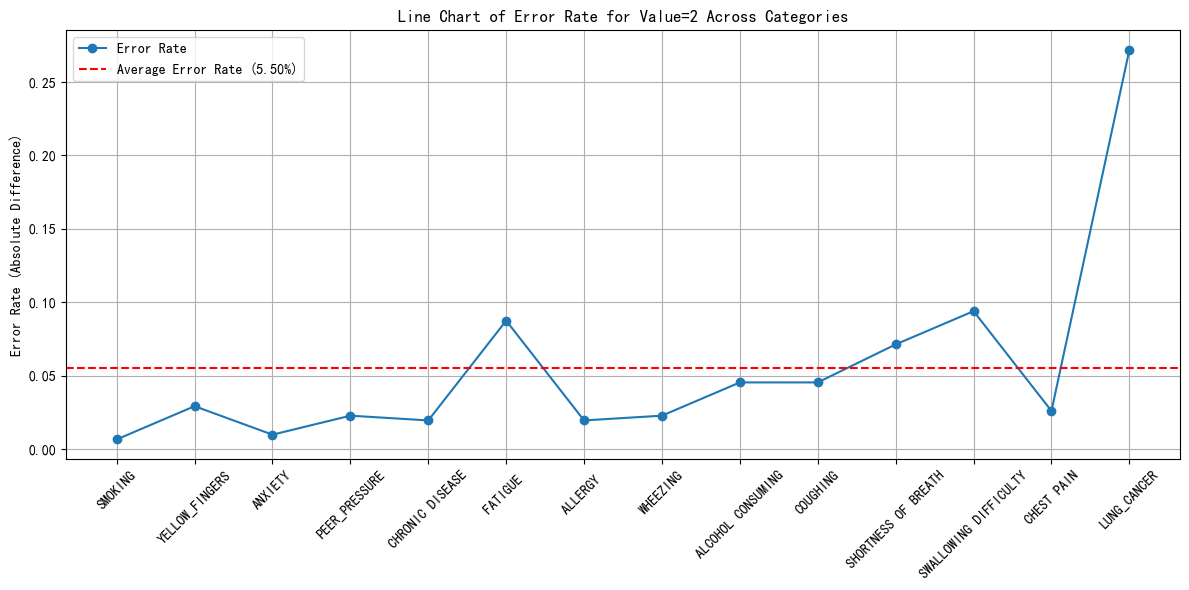

In [56]:
import csv
import matplotlib.pyplot as plt

def calculate_accuracy(file1, file2):
    with open(file1, 'r') as f1, open(file2, 'r') as f2:
        reader1 = csv.reader(f1)
        reader2 = csv.reader(f2)
        
        # Read headers
        header1 = next(reader1)
        header2 = next(reader2)
        
        if header1 != header2:
            raise ValueError("Headers of the two files do not match.")
        
        # Preprocessing: convert 'LUNG_CANCER' values 'YES'/'NO' to '2'/'1' in file1
        if header1[-1] == 'LUNG_CANCER':
            index_lung_cancer = header1.index('LUNG_CANCER')
            rows1 = list(reader1)
            for row in rows1:
                if row[index_lung_cancer] == 'YES':
                    row[index_lung_cancer] = '2'
                elif row[index_lung_cancer] == 'NO':
                    row[index_lung_cancer] = '1'
        else:
            rows1 = list(reader1)

        rows2 = list(reader2)

        total_rows = 0
        column_total_s = [0] * len(header1)
        column_total_r = [0] * len(header1)
        column_two_count_s = [0] * len(header1)
        column_two_count_r = [0] * len(header1)
        column_correct = [0] * len(header1)

        for row1, row2 in zip(rows1, rows2):
            total_rows += 1
            for i, (val1, val2) in enumerate(zip(row1, row2)):
                if i > 1:  # Skip the first two columns
                    column_total_s[i] += 1
                    column_total_r[i] += 1
                    if val1 == '2':
                        column_two_count_s[i] += 1
                    if val2 == '2':
                        column_two_count_r[i] += 1
                    if val1 == val2:
                        column_correct[i] += 1
        
        # Calculate the ratio of value=2 in each column
        column_two_ratio_s = [two_count / total if total > 0 else 0 for two_count, total in zip(column_two_count_s, column_total_s)]
        column_two_ratio_r = [two_count / total if total > 0 else 0 for two_count, total in zip(column_two_count_r, column_total_r)]
        column_diff_abs = [abs(ratio_s - ratio_r) for ratio_s, ratio_r in zip(column_two_ratio_s, column_two_ratio_r)]

        # Overall accuracy
        overall_accuracy = sum(column_correct[2:]) / sum(column_total_s[2:]) if sum(column_total_s[2:]) > 0 else 0
        # Average absolute difference
        avg_diff_abs = sum(column_diff_abs[2:]) / len(column_diff_abs[2:]) if len(column_diff_abs[2:]) > 0 else 0
        
        # Output results
        print(f"\nOverall accuracy: {overall_accuracy:.2%}")
        print(f"Average absolute difference in probability: {avg_diff_abs:.2%}")
        print("Proportion of value=2 in each column and their differences:")
        for col_name, ratio_s, ratio_r, diff in zip(header1[2:], column_two_ratio_s[2:], column_two_ratio_r[2:], column_diff_abs[2:]):
            print(f"{col_name}: original={ratio_s:.2%}, reconstructed={ratio_r:.2%}, abs difference={diff:.2%}")
        
        # ---------- Plotting ----------
        column_names = header1[2:]
        diffs = column_diff_abs[2:]

        plt.figure(figsize=(12, 6))
        plt.plot(column_names, diffs, marker='o', linestyle='-', label='Error Rate')
        plt.axhline(y=avg_diff_abs, color='red', linestyle='--', label=f'Average Error Rate ({avg_diff_abs:.2%})')
        plt.xticks(rotation=45)
        plt.ylabel('Error Rate (Absolute Difference)')
        plt.title('Line Chart of Error Rate for Value=2 Across Categories')
        plt.legend()
        plt.tight_layout()
        plt.grid(True)
        plt.show()

# Example usage
file1 = "survey lung cancer.csv"
file2 = "reconstructed_survey1.csv"
calculate_accuracy(file1, file2)




Overall accuracy: 59.52%
Average absolute difference in probability: 18.01%
Proportion of value=2 in each column and their differences:
SMOKING: original=56.31%, reconstructed=35.92%, abs difference=20.39%
YELLOW_FINGERS: original=56.96%, reconstructed=36.25%, abs difference=20.71%
ANXIETY: original=49.84%, reconstructed=35.92%, abs difference=13.92%
PEER_PRESSURE: original=50.16%, reconstructed=37.22%, abs difference=12.94%
CHRONIC DISEASE: original=50.49%, reconstructed=36.57%, abs difference=13.92%
FATIGUE : original=67.31%, reconstructed=41.75%, abs difference=25.57%
ALLERGY : original=55.66%, reconstructed=41.42%, abs difference=14.24%
WHEEZING: original=55.66%, reconstructed=38.19%, abs difference=17.48%
ALCOHOL CONSUMING: original=55.66%, reconstructed=39.48%, abs difference=16.18%
COUGHING: original=57.93%, reconstructed=39.16%, abs difference=18.77%
SHORTNESS OF BREATH: original=64.08%, reconstructed=38.19%, abs difference=25.89%
SWALLOWING DIFFICULTY: original=46.93%, recons

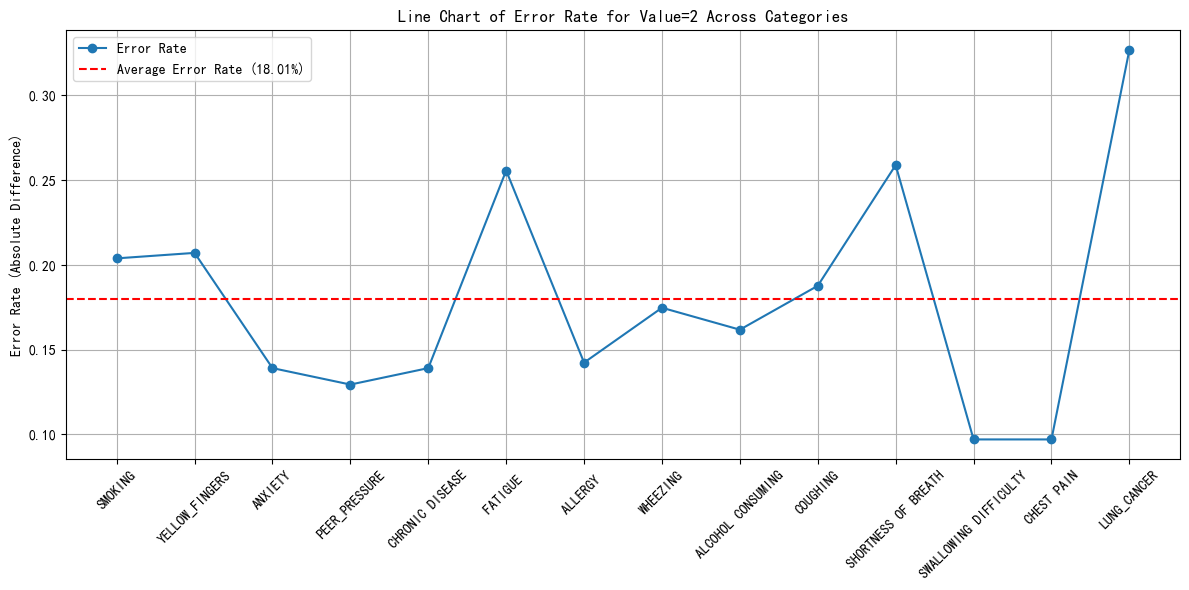

In [59]:
import csv
import matplotlib.pyplot as plt

def calculate_accuracy(file1, file2):
    with open(file1, 'r') as f1, open(file2, 'r') as f2:
        reader1 = csv.reader(f1)
        reader2 = csv.reader(f2)
        
        # Read headers
        header1 = next(reader1)
        header2 = next(reader2)
        
        if header1 != header2:
            raise ValueError("Headers of the two files do not match.")
        
        # Preprocessing: convert 'LUNG_CANCER' values 'YES'/'NO' to '2'/'1' in file1
        if header1[-1] == 'LUNG_CANCER':
            index_lung_cancer = header1.index('LUNG_CANCER')
            rows1 = list(reader1)
            for row in rows1:
                if row[index_lung_cancer] == 'YES':
                    row[index_lung_cancer] = '2'
                elif row[index_lung_cancer] == 'NO':
                    row[index_lung_cancer] = '1'
        else:
            rows1 = list(reader1)

        rows2 = list(reader2)

        total_rows = 0
        column_total_s = [0] * len(header1)
        column_total_r = [0] * len(header1)
        column_two_count_s = [0] * len(header1)
        column_two_count_r = [0] * len(header1)
        column_correct = [0] * len(header1)

        for row1, row2 in zip(rows1, rows2):
            total_rows += 1
            for i, (val1, val2) in enumerate(zip(row1, row2)):
                if i > 1:  # Skip the first two columns
                    column_total_s[i] += 1
                    column_total_r[i] += 1
                    if val1 == '2':
                        column_two_count_s[i] += 1
                    if val2 == '2':
                        column_two_count_r[i] += 1
                    if val1 == val2:
                        column_correct[i] += 1
        
        # Calculate the ratio of value=2 in each column
        column_two_ratio_s = [two_count / total if total > 0 else 0 for two_count, total in zip(column_two_count_s, column_total_s)]
        column_two_ratio_r = [two_count / total if total > 0 else 0 for two_count, total in zip(column_two_count_r, column_total_r)]
        column_diff_abs = [abs(ratio_s - ratio_r) for ratio_s, ratio_r in zip(column_two_ratio_s, column_two_ratio_r)]

        # Overall accuracy
        overall_accuracy = sum(column_correct[2:]) / sum(column_total_s[2:]) if sum(column_total_s[2:]) > 0 else 0
        # Average absolute difference
        avg_diff_abs = sum(column_diff_abs[2:]) / len(column_diff_abs[2:]) if len(column_diff_abs[2:]) > 0 else 0
        
        # Output results
        print(f"\nOverall accuracy: {overall_accuracy:.2%}")
        print(f"Average absolute difference in probability: {avg_diff_abs:.2%}")
        print("Proportion of value=2 in each column and their differences:")
        for col_name, ratio_s, ratio_r, diff in zip(header1[2:], column_two_ratio_s[2:], column_two_ratio_r[2:], column_diff_abs[2:]):
            print(f"{col_name}: original={ratio_s:.2%}, reconstructed={ratio_r:.2%}, abs difference={diff:.2%}")
        
        # ---------- Plotting ----------
        column_names = header1[2:]
        diffs = column_diff_abs[2:]

        plt.figure(figsize=(12, 6))
        plt.plot(column_names, diffs, marker='o', linestyle='-', label='Error Rate')
        plt.axhline(y=avg_diff_abs, color='red', linestyle='--', label=f'Average Error Rate ({avg_diff_abs:.2%})')
        plt.xticks(rotation=45)
        plt.ylabel('Error Rate (Absolute Difference)')
        plt.title('Line Chart of Error Rate for Value=2 Across Categories')
        plt.legend()
        plt.tight_layout()
        plt.grid(True)
        plt.show()

# Example usage
file1 = "survey lung cancer.csv"
file2 = "reconstructed_NStoPS-I.csv"
calculate_accuracy(file1, file2)


Since in the mixed negative survey, we do not care about the individual prediction results but pay more attention to the overall prediction trend of each question, the proportion of options for a single question can better illustrate the issue. We can see that the reconstruction method based on Hidden Markov in the mixed negative survey takes into account the correlation between the questions and is much better than the traditional NStoPS reconstruction method. Moreover, it protects the privacy of the respondents and has great application potential.